In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import random

In [2]:
number = 990
episl = 0.1

In [3]:
outliers = int(number*episl)
clean_data = number - outliers
delta = episl*np.sqrt(math.log(1/episl))
lamda = delta**2/episl

In [4]:
#projection of the data onto the two largest eigenvector of the clean data
def pic(clean_data, data):
    num = len(data[0])
    cov = np.cov(clean_data.transpose())
    eigenvalue,eigenvector = eigh(cov,subset_by_index=[num - 2, num - 1])
    e1 = eigenvector[:,0]
    e2 = eigenvector[:,1]
    x = []#how many onto the first eigenvector
    y = []#how many onto the second eigenvector
    for i in range(len(data[:,0])):
        xi = (np.dot(data[i], e1) / np.dot(e1, e1))
        yi = (np.dot(data[i], e2) / np.dot(e2, e2))
        x.append(xi)
        y.append(yi)
    plt.scatter(x, y)
    plt.show()


In [5]:
# create a n clean points, and epsil*n outliers, delta = ep*sq(log(1/ep)), lamda = delta^2/ep
mu_c, sigma_c = 0, 1 # mean and standard deviation
s = np.random.normal(mu_c, sigma_c, size = (clean_data,170))
mu_o, sigma_o = 6, 2
u = np.random.normal(mu_o, sigma_o, size = (outliers,170))
data = np.append(u, s, axis=0)
np.random.shuffle(data)
#Try dimension of more than 100
#Seperate the outliers all around the dataset, not just the back of it

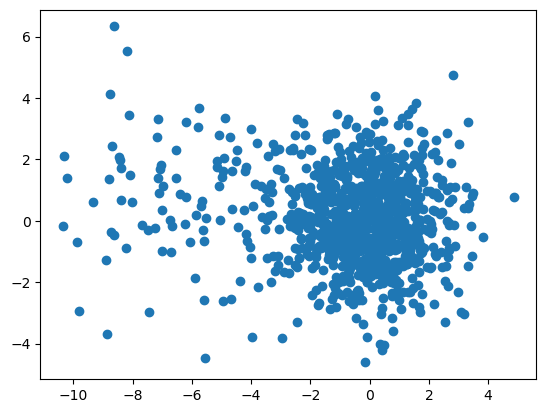

None


In [6]:
print(pic(s, data))

In [7]:
def f(data,v,uT):
    g = np.dot((data-uT),v)**2
    corr = int(episl*len(data[:,0]))   
    ind = np.argpartition(g, -corr)[-corr:]
    top = g[ind]
    f = np.zeros(len(data[:,0]))
    for i in range(corr):
        f[ind[i]] = top[i]
    return f

In [8]:
def delete(data):
    number = len(data[:,0])
    cov = np.cov(data.transpose())
    uT = np.mean(data, axis = 0)
    eigenvalue,eigenvector = eig(cov)
    n = np.linalg.norm(eigenvector, axis = 1)
    index = np.argmax(n)
    v = eigenvector[index, :]
    n = np.linalg.norm(eigenvalue)
    index = np.argmax(n)
    largest_eigenvalue = eigenvalue[index]
    #print(largest_eigenvalue)
    while largest_eigenvalue >=(1+ 200*lamda):
        a = f(data,v,uT)
        maximum = a.max()
        prob = a/maximum
        index = 0
        for i in range(number):
            if(prob[i] == 0):
                index+=1
                continue
            else:
                randprob = random.random()
                if(randprob <= prob[index]):
                    data = np.delete(data, index, 0)
                    number -=1
        cov = np.cov(data.transpose())
        uT = np.mean(data, axis = 0)
        eigenvalue,eigenvector = eig(cov)
        n = np.linalg.norm(eigenvector, axis = 1)
        index = np.argmax(n)
        v = eigenvector[index, :]
        n = np.linalg.norm(eigenvalue)
        index = np.argmax(n)
        largest_eigenvalue = eigenvalue[index]
    mu = np.mean(data, axis = 0)
    return mu,data

526


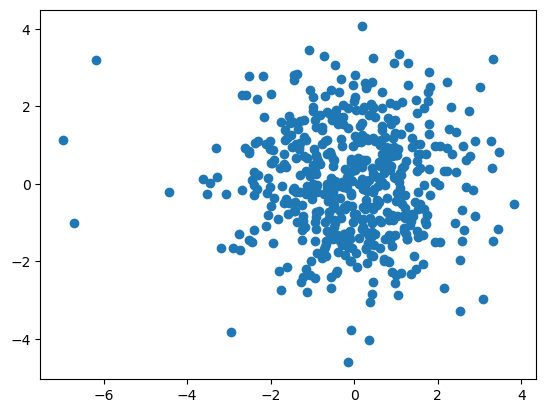

None


In [9]:
mu, data = delete(data)
print(len(data[:,0]))
print(pic(s, data))

In [10]:
# plot the error between the clean data and the estimated one, one is the error and the other is the dimension
clean_mean = np.mean(s, axis = 0)
estimated_mean = mu
error = np.sqrt(np.sum((clean_mean - estimated_mean)**2))
print(error)

0.6055065672140876


In [11]:
dimension = 2
error = []
for i in range(100):
    s = np.random.normal(mu_c, sigma_c, size = (clean_data,dimension))
    u = np.random.normal(mu_o, sigma_o, size = (outliers,dimension))
    data = np.append(u, s, axis=0)
    np.random.shuffle(data)
    mu, data = delete(data)
    clean_mean = np.mean(s, axis = 0)
    estimated_mean = mu
    e = np.sqrt(np.sum((clean_mean - estimated_mean)**2))
    error.append(e)
    dimension+=1

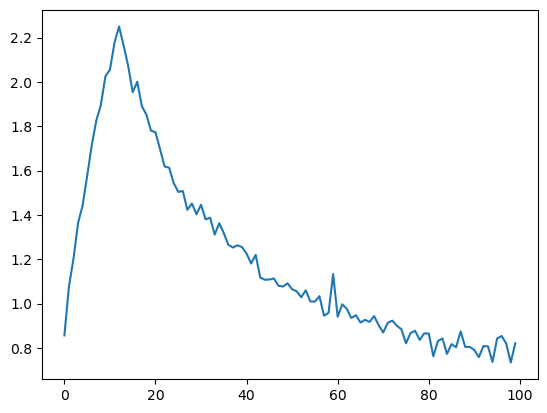

In [12]:
plt.plot(error)
plt.show()